## Model Evaluation in Regression Models

Regression amacımız bilinmeyen bir durumu eldeki verilerimizle tahmin etmektir( Future Case ). Nasıl?
Evaluation modelleri ile. 2 tane yaklaşımımız var:
- **Train and test on the same dataset**
- **Train/test split**


**Regressionn Evaluation Metrics**

#### Train and test on the same dataset

In [1]:
import pandas as pd 

In [4]:
df=pd.read_csv("FuelConsumptionCo2.csv")

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
cdf=df[["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_COMB","CO2EMISSIONS"]]

In [8]:
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


We use entire dataset for training. For example, assume that we have 10 records in our dataset.
We select a small portion of the dataset, such as row numbers 6 to 9. ( ındependent variables)
- The labels are called "Actual Values" of the test set.

What can I wait after this evalutaion point?

1. High "Training Accuracy"
 - We dont want **overfit** models. Very high training accuracy doesnt necessar for our models .

2. Low "out-of-sample-accuracy"
 - It's important that our models have high out-of-sample accuracy.
 
**Out-of-sample** :  the data you don't have but want to forecast or estimate.

#### Train/Test Split

- Mutually exclusive
- More accurate evaluation on out-of-sample accuracy. Because the testing dataset is not part of the training dataset.
- It is **more realistic** for real -world problems.
- Train/ Test split is highly dependent on the datasets on which the data set was trained and tested.

  - How can I solve it? Another evalution models to resolve by new methods.
  1. K- Fold Cross Validation

## Evaluation Metrics in Regression
source :https://developer.nvidia.com/blog/a-comprehensive-overview-of-regression-evaluation-metrics/

Regression refers to predictive modeling problems that involve predicting a numeric value.
- MAE
- MSE
- RMSE
- Relative Absolute Error (RAE)
- Relative Squared Error (RSE)
- R2


#### Mean Absolute Error(MAE)

In [11]:
import numpy as np

expected=[1.0]*11
predicted=[round(1.0-i*0.1,1) for i in range(11)]

In [12]:
print("real values:",expected)
print("predicted values:",predicted)

real values: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
predicted values: [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]


In [13]:
from sklearn.metrics import mean_absolute_error

mae=mean_absolute_error(expected,predicted)
print("Mean Absolute Error:",mae)

Mean Absolute Error: 0.5


In [14]:
# For all steps
for i in range(len(expected)):
    error=abs(expected[i]-predicted[i])
    print(f"{expected[i]}-{predicted[i]}-{error:.2f}")


1.0-1.0-0.00
1.0-0.9-0.10
1.0-0.8-0.20
1.0-0.7-0.30
1.0-0.6-0.40
1.0-0.5-0.50
1.0-0.4-0.60
1.0-0.3-0.70
1.0-0.2-0.80
1.0-0.1-0.90
1.0-0.0-1.00


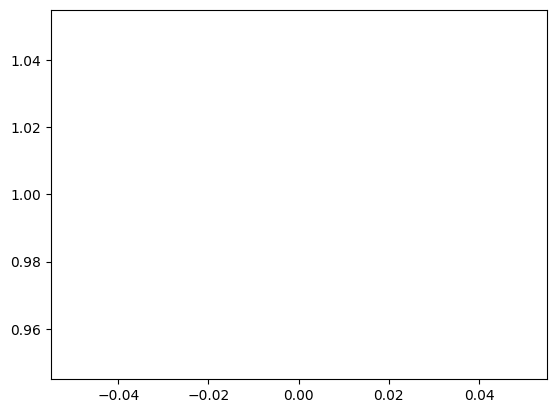

In [15]:
from matplotlib import pyplot
pyplot.plot(error)
pyplot.show()

#### Mean Squared Error(MSE)

In [16]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(expected,predicted)
print("mse:",mse)

mse: 0.35000000000000003


In [17]:
# For all steps
errors=[]
for i in range(len(expected)):
    error=(expected[i]-predicted[i])**2
    errors.append(error)
    print(f"{expected[i]}-{predicted[i]}-{error:.2f}")

1.0-1.0-0.00
1.0-0.9-0.01
1.0-0.8-0.04
1.0-0.7-0.09
1.0-0.6-0.16
1.0-0.5-0.25
1.0-0.4-0.36
1.0-0.3-0.49
1.0-0.2-0.64
1.0-0.1-0.81
1.0-0.0-1.00


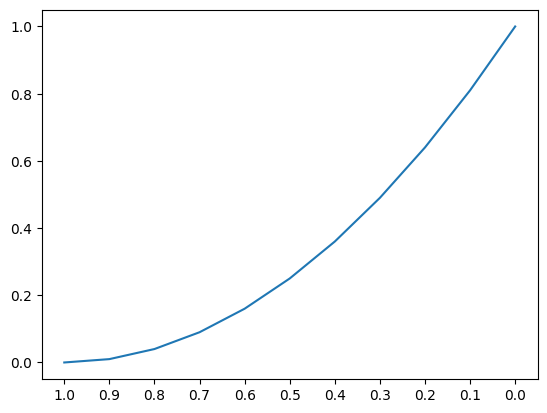

In [18]:
from matplotlib import pyplot
pyplot.xticks(ticks=[i for i in range (len(errors))],labels=predicted)
pyplot.plot(errors)
pyplot.show()

#### Root Mean Squared Error (RMSE)

In [19]:
rmse=np.sqrt(mean_squared_error(expected,predicted))
# Way 2
#rmse=(mean_squared_error(expected,predicted,squared=False))
print("rmse:",rmse)

rmse: 0.5916079783099616


#### R-Squared (r2) Score
- The higher the r2 score , the better the model fits your data


In [20]:
from sklearn.metrics import r2_score

r2=r2_score(expected,predicted)
print("R-squared Score:",r2)

R-squared Score: 0.0
